# Togo Dapaong EDA
Exploratory Data Analysis on the Togo Dapaong Solar Dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [7]:
# Load the dataset
df_togo_dapaong = pd.read_csv('notebooks/data/togo-dapaong_qc.csv')

## Summary Statistics & Missing-Value Report
Generate summary statistics and identify missing values.

In [10]:
# Summary statistics for numeric columns
summary_stats = df_togo_dapaong.describe()
print(summary_stats)

# Missing value report
missing_values = df_togo_dapaong.isna().sum()
print(missing_values[missing_values > 0])  # Columns with missing values

# List columns with >5% nulls
threshold = 0.05 * len(df_togo_dapaong)
print(missing_values[missing_values > threshold])

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

## Outlier Detection & Basic Cleaning
Identify and handle outliers and missing values in key columns.

In [12]:
from scipy import stats
import numpy as np

# Compute Z-scores for selected columns
z_scores = np.abs(stats.zscore(df_togo_dapaong[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]))
outliers = (z_scores > 3).any(axis=1)

# Add outlier column to the DataFrame
df_togo_dapaong['outlier'] = outliers

In [13]:
# Impute missing values with the median for numeric columns only
numeric_cols = df_togo_dapaong.select_dtypes(include=[np.number]).columns
df_togo_dapaong[numeric_cols] = df_togo_dapaong[numeric_cols].fillna(df_togo_dapaong[numeric_cols].median())

In [14]:
# Check for remaining missing values
print(df_togo_dapaong.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
outlier               0
dtype: int64


In [15]:
# Export Cleaned Data
df_togo_dapaong.to_csv('notebooks/data/togo_clean.csv', index=False)

## Time Series Analysis
Analyze GHI, DNI, DHI, and Tamb over time.

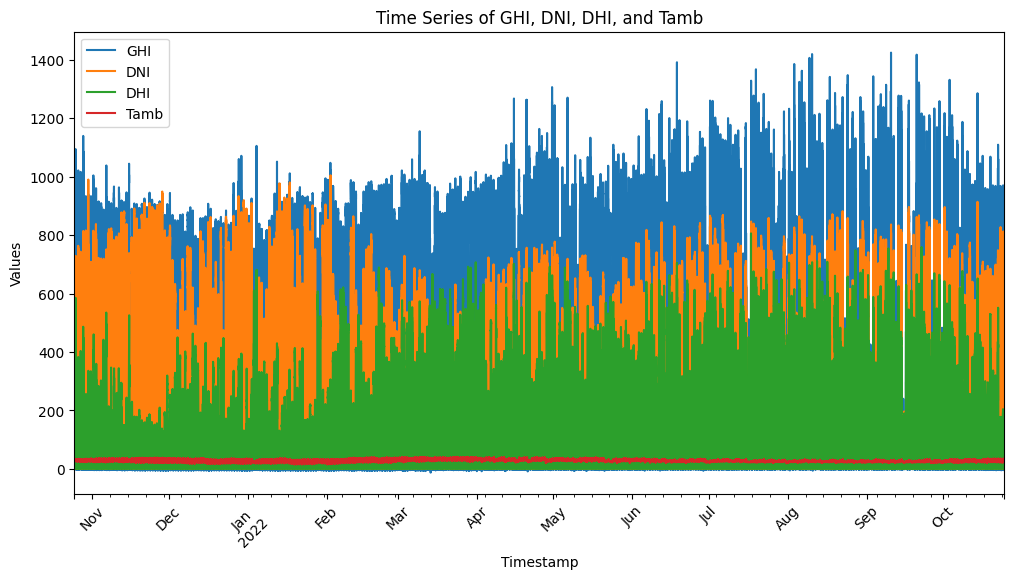

In [16]:
# Ensure 'Timestamp' is in datetime format
df_togo_dapaong['Timestamp'] = pd.to_datetime(df_togo_dapaong['Timestamp'])

# Set the Timestamp as the index and plot
df_togo_dapaong.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Monthly Average Analysis
Calculate and plot monthly averages for GHI, DNI, DHI, and Tamb.

C:\Users\metya\AppData\Local\Temp\ipykernel_2800\1261046357.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_togo_dapaong.set_index('Timestamp').resample('M').mean()


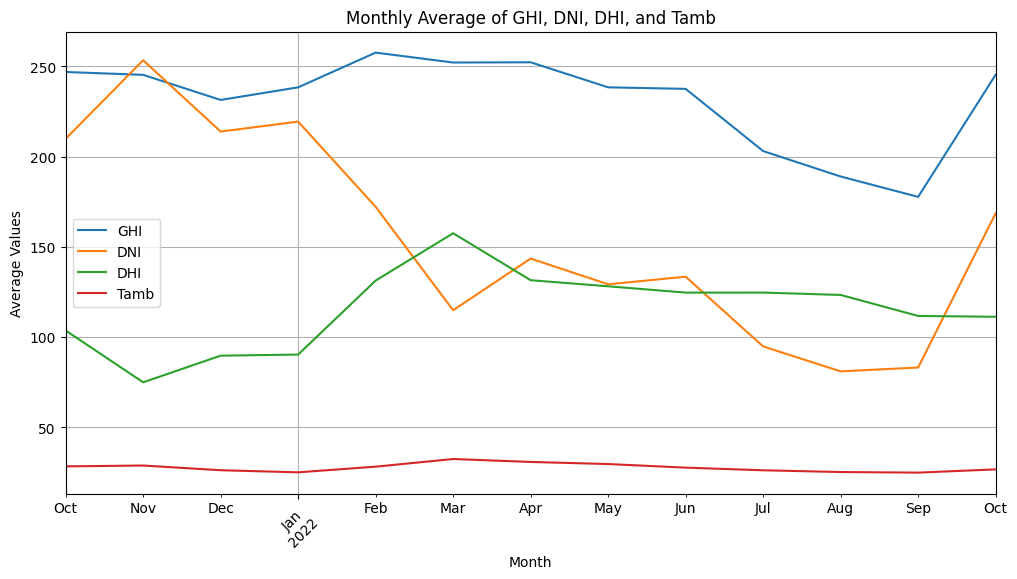

In [17]:
# Set the Timestamp as the index and calculate monthly averages
monthly_avg = df_togo_dapaong.set_index('Timestamp').resample('M').mean()

# Plot the monthly averages for GHI, DNI, DHI, and Tamb
monthly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

## Hourly Average Analysis
Extract the hour from the Timestamp for daily analysis and plot the average values.

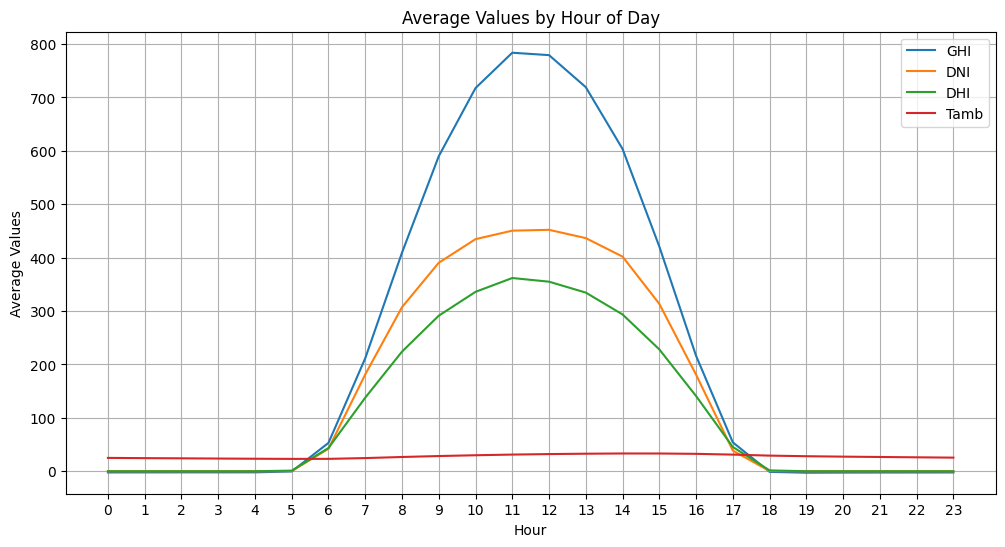

In [18]:
# Extract the hour from the Timestamp for daily analysis
df_togo_dapaong['Hour'] = df_togo_dapaong['Timestamp'].dt.hour

# Group by hour and calculate the average for each variable
hourly_avg = df_togo_dapaong.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot the average values by hour of the day
hourly_avg.plot(kind='line', figsize=(12, 6))
plt.title('Average Values by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Values')
plt.xticks(range(24))
plt.grid()
plt.show()

## Cleaning Impact
Analyze the impact of cleaning on ModA and ModB.

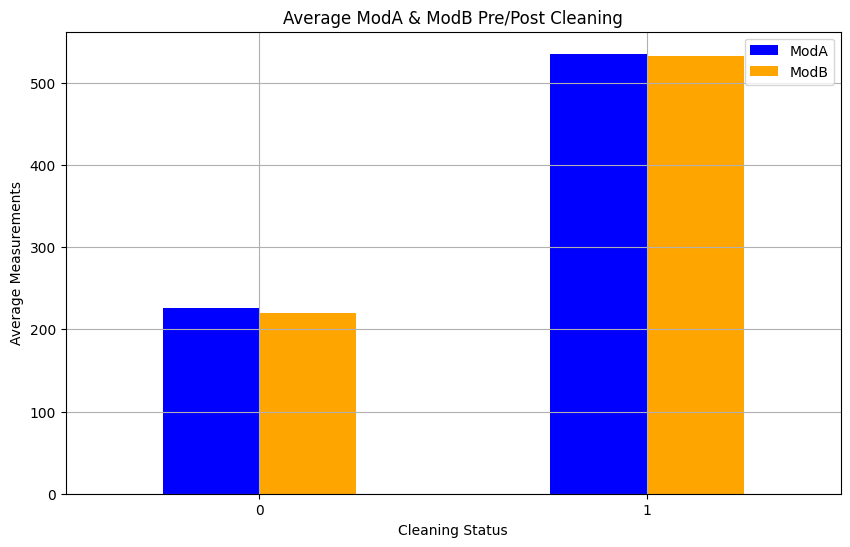

In [19]:
# Group by 'Cleaning' and calculate mean for ModA and ModB
cleaned_avg = df_togo_dapaong.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plotting the averages
cleaned_avg.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Status')
plt.ylabel('Average Measurements')
plt.xticks(rotation=0)
plt.grid()
plt.show()

## Correlation & Relationship Analysis
Explore correlations between key variables.

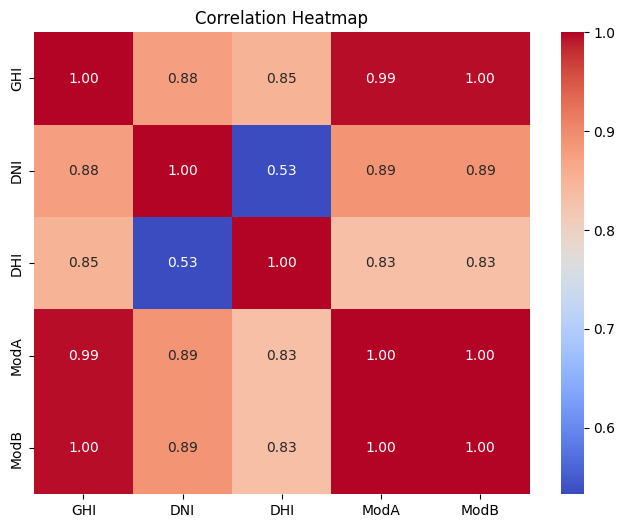

In [20]:
import seaborn as sns

# Select relevant columns for correlation analysis
correlation_matrix = df_togo_dapaong[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Scatter Plots
Visualize relationships between wind speed, humidity, and solar irradiance.

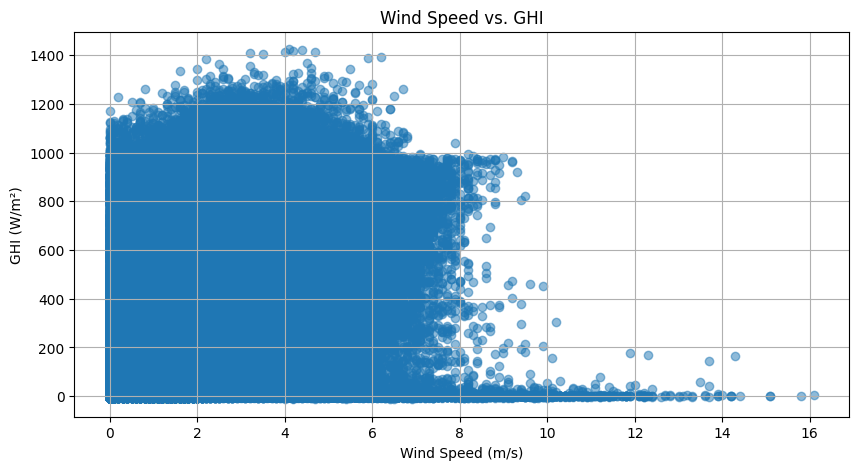

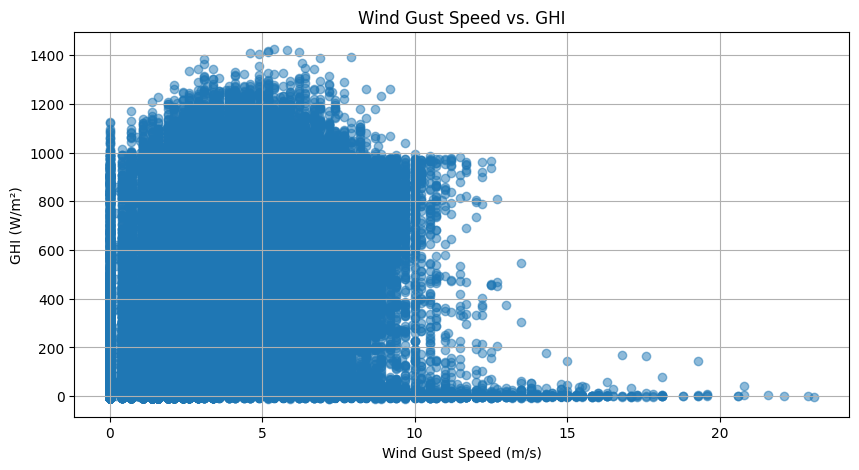

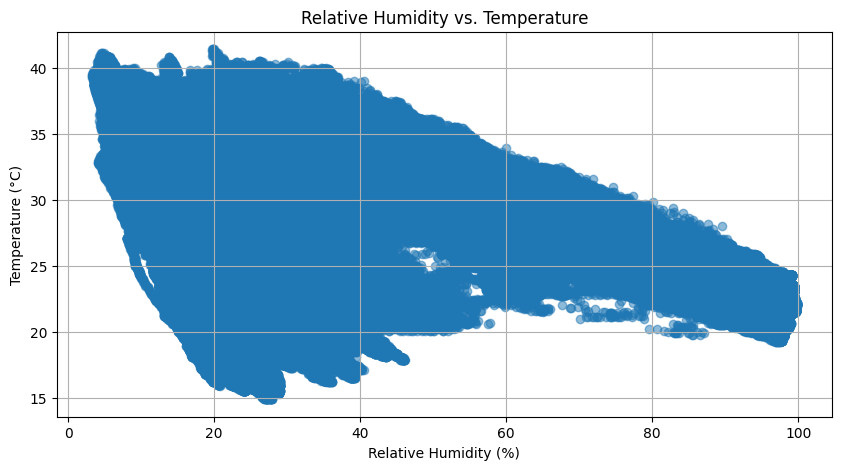

In [21]:
# WS vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df_togo_dapaong['WS'], df_togo_dapaong['GHI'], alpha=0.5)
plt.title('Wind Speed vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

# WSgust vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df_togo_dapaong['WSgust'], df_togo_dapaong['GHI'], alpha=0.5)
plt.title('Wind Gust Speed vs. GHI')
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

# RH vs. Tamb
plt.figure(figsize=(10, 5))
plt.scatter(df_togo_dapaong['RH'], df_togo_dapaong['Tamb'], alpha=0.5)
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

## Wind & Distribution Analysis
Analyze wind data and visualize distributions.

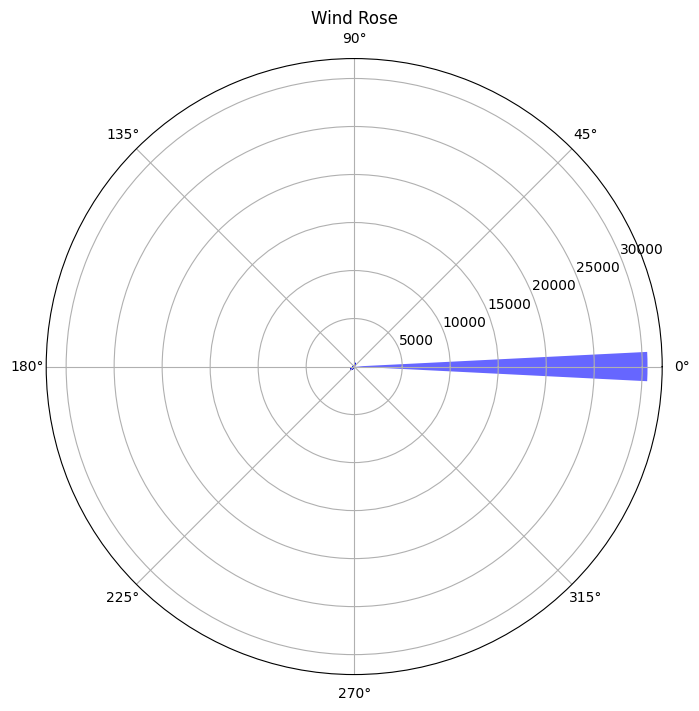

In [22]:
from math import pi

# Prepare data for wind rose
wind_data = df_togo_dapaong.groupby('WD').size()
angles = wind_data.index * (2 * pi / 360)
radii = wind_data.values

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.bar(angles, radii, width=0.1, color='blue', alpha=0.6)
ax.set_title('Wind Rose')
plt.show()

### Histograms
Visualize the distribution of GHI and wind speed.

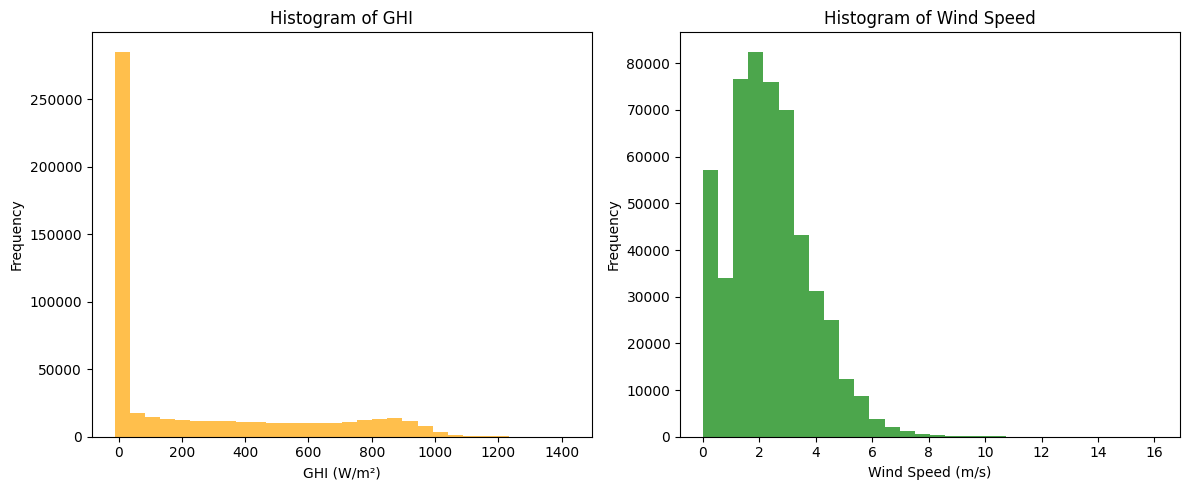

In [23]:
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(df_togo_dapaong['GHI'], bins=30, color='orange', alpha=0.7)
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(df_togo_dapaong['WS'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Temperature Analysis
Examine how relative humidity (RH) influences temperature and solar radiation.

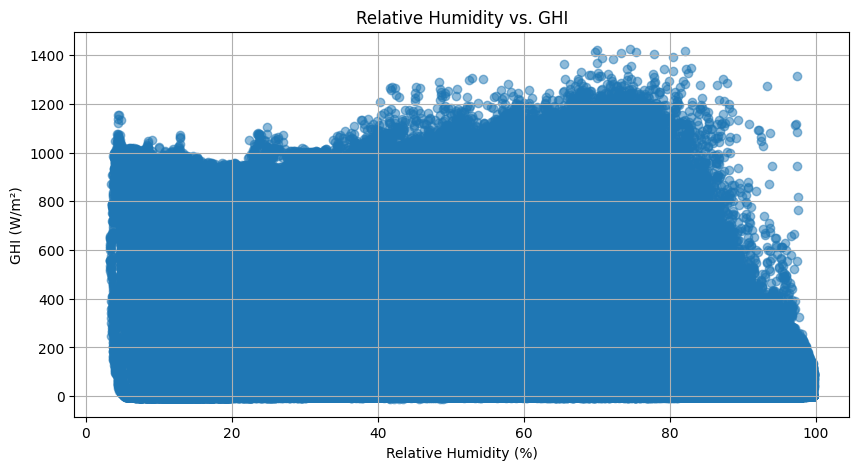

In [24]:
# Scatter plot for RH vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df_togo_dapaong['RH'], df_togo_dapaong['GHI'], alpha=0.5)
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

## Bubble Chart
Visualize GHI vs. Tamb with bubble size = RH.

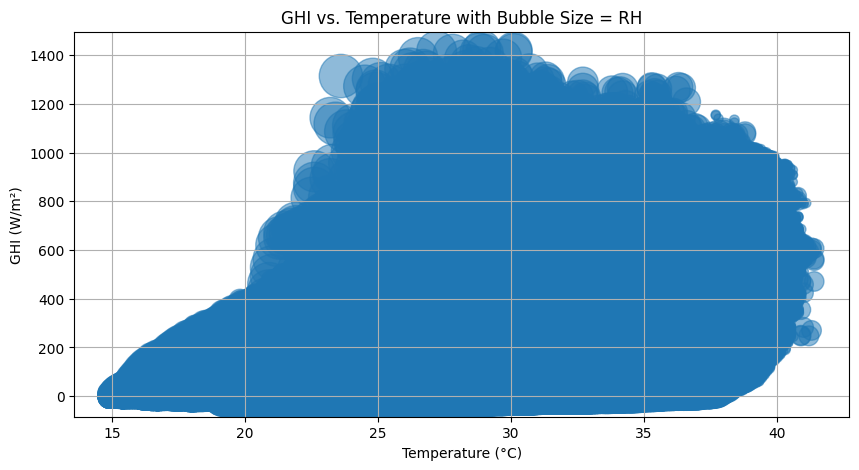

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(df_togo_dapaong['Tamb'], df_togo_dapaong['GHI'], s=df_togo_dapaong['RH']*10, alpha=0.5)
plt.title('GHI vs. Temperature with Bubble Size = RH')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()